In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import csv
import pickle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Data Loading**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***Information***
This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure  in the ionosphere.  "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number.  There were 17 pulse numbers for the Goose Bay system.  Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

In [4]:
dataSet = 'balance-scale'
filePath = '/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/'+dataSet+'.csv'
data = pd.read_csv(filePath)
data

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1
...,...,...,...,...,...
619,L,5,5,5,1
620,L,5,5,5,2
621,L,5,5,5,3
622,L,5,5,5,4


In [5]:
file = data
print("\nOriginal file:")
print(file)

# adding header
headerList = ['balance', 'left_weight', 'left_distance', 'right_weight', 'right_distance']

# converting data frame to csv
file.to_csv("gfg2.csv", header=headerList, index=False)

# display modified csv file
file2 = pd.read_csv("gfg2.csv")
print('\nModified file:')
print(file2)


Original file:
     B  1  1.1  1.2  1.3
0    R  1    1    1    2
1    R  1    1    1    3
2    R  1    1    1    4
3    R  1    1    1    5
4    R  1    1    2    1
..  .. ..  ...  ...  ...
619  L  5    5    5    1
620  L  5    5    5    2
621  L  5    5    5    3
622  L  5    5    5    4
623  B  5    5    5    5

[624 rows x 5 columns]

Modified file:
    balance  left_weight  left_distance  right_weight  right_distance
0         R            1              1             1               2
1         R            1              1             1               3
2         R            1              1             1               4
3         R            1              1             1               5
4         R            1              1             2               1
..      ...          ...            ...           ...             ...
619       L            5              5             5               1
620       L            5              5             5               2
621       L   

In [6]:
file2

,balance,left_weight,left_distance,right_weight,right_distance
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1
...,...,...,...,...,...
619,L,5,5,5,1
620,L,5,5,5,2
621,L,5,5,5,3
622,L,5,5,5,4


In [7]:
for i in range(len(file2)):
  if file2.iloc[i,0]=='B':
    file2.iloc[i,0] = 1.0
  else:
    file2.iloc[i,0] = 0.0
file2

,balance,left_weight,left_distance,right_weight,right_distance
0,0.0,1,1,1,2
1,0.0,1,1,1,3
2,0.0,1,1,1,4
3,0.0,1,1,1,5
4,0.0,1,1,2,1
...,...,...,...,...,...
619,0.0,5,5,5,1
620,0.0,5,5,5,2
621,0.0,5,5,5,3
622,0.0,5,5,5,4


In [8]:
data = file2

In [9]:
data = data.replace(np.nan,0.0)


In [10]:
data.shape

(624, 5)

In [11]:
data.iloc[3,3]

1

In [12]:
from random import shuffle
train, test= train_test_split(data, test_size=0.2, shuffle=True, random_state=42)
print(train.shape,test.shape)

(499, 5) (125, 5)


In [13]:
train.head()

,balance,left_weight,left_distance,right_weight,right_distance
396,0.0,4,1,5,3
329,0.0,3,4,2,1
6,0.0,1,1,2,3
104,0.0,1,5,2,1
114,0.0,1,5,4,1


In [14]:
features=train.columns[1:]
Score=[]
features

Index(['left_weight', 'left_distance', 'right_weight', 'right_distance'], dtype='object')

In [15]:
X = data[features]
y = data['balance']
X.shape

(624, 4)

# **Data Split (Major and Minor)**

In [16]:
for(Column_35), group in train.groupby(['balance']):
  group.to_csv(f'{Column_35}.csv', index=False)
# print(pd.read_csv("0.0.csv"))
# print(pd.read_csv("1.0.csv"))
train_zero = pd.read_csv("0.0.csv")
train_one = pd.read_csv("1.0.csv")
train_zero

,balance,left_weight,left_distance,right_weight,right_distance
0,0.0,4,1,5,3
1,0.0,3,4,2,1
2,0.0,1,1,2,3
3,0.0,1,5,2,1
4,0.0,1,5,4,1
...,...,...,...,...,...
455,0.0,1,3,5,3
456,0.0,1,5,2,3
457,0.0,3,1,5,2
458,0.0,4,3,3,2


In [17]:
train_one

,balance,left_weight,left_distance,right_weight,right_distance
0,1.0,4,5,4,5
1,1.0,3,2,2,3
2,1.0,3,3,3,3
3,1.0,4,2,4,2
4,1.0,1,4,4,1
5,1.0,5,5,5,5
6,1.0,3,5,3,5
7,1.0,2,3,3,2
8,1.0,1,2,1,2
9,1.0,2,5,5,2


In [18]:
train_zero.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/train_zero.csv')
train_one.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/train_one.csv')


In [19]:
major_class = train_zero
minor_class = train_one

In [20]:
# before scaling the min and max values for both alcohol and malic acid are different 

minor_class.describe().T  


,count,mean,std,min,25%,50%,75%,max
balance,39.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
left_weight,39.0,3.076923,1.421352,1.0,2.0,3.0,4.0,5.0
left_distance,39.0,2.923077,1.439748,1.0,2.0,3.0,4.0,5.0
right_weight,39.0,2.974359,1.441622,1.0,2.0,3.0,4.0,5.0
right_distance,39.0,3.025641,1.423250,1.0,2.0,3.0,4.0,5.0


In [21]:
major_class.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,460.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
left_weight,460.0,3.017391,1.412565,1.0,2.0,3.0,4.0,5.0
left_distance,460.0,2.986957,1.421835,1.0,2.0,3.0,4.0,5.0
right_weight,460.0,3.060870,1.440388,1.0,2.0,3.0,4.0,5.0
right_distance,460.0,3.015217,1.422580,1.0,2.0,3.0,4.0,5.0


# **Auto Encoder**

In [41]:
import keras
from keras import layers

# This is the size of our encoded representations
n = len(data.iloc[0]) - 1
encoding_dim = n 

# This is our input image
input_img = keras.Input(shape=(n,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation=None)(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(n, activation=None)(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [42]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [43]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [44]:
autoencoder.compile(optimizer='adam', loss='mse')

In [45]:
x_train = minor_class[features]
x_test = major_class[features]
y_train = minor_class['balance']
y_test = major_class['balance']

# **Data Scaling**

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()    # create an object of class

scaler.fit(x_train)       #  fit on training i/p data
x_train_scaled = scaler.transform(x_train)    # transform model on both traing and testing data

scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)


In [47]:
# convert the numpy array after transform into a dataframe
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)
#x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)


In [48]:
x_train.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/x_train.csv')
x_test.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/x_test.csv')
x_train_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/x_train_scaled.csv')
x_test_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/x_test_scaled.csv')


In [49]:
x_train.shape

(39, 4)

In [50]:
x_test.shape

(460, 4)

In [51]:
x_train

,left_weight,left_distance,right_weight,right_distance
0,4,5,4,5
1,3,2,2,3
2,3,3,3,3
3,4,2,4,2
4,1,4,4,1
5,5,5,5,5
6,3,5,3,5
7,2,3,3,2
8,1,2,1,2
9,2,5,5,2


In [52]:
x_test

,left_weight,left_distance,right_weight,right_distance
0,4,1,5,3
1,3,4,2,1
2,1,1,2,3
3,1,5,2,1
4,1,5,4,1
...,...,...,...,...
455,1,3,5,3
456,1,5,2,3
457,3,1,5,2
458,4,3,3,2


In [53]:
x_train_scaled

,left_weight,left_distance,right_weight,right_distance
0,0.75,1.00,0.75,1.00
1,0.50,0.25,0.25,0.50
2,0.50,0.50,0.50,0.50
3,0.75,0.25,0.75,0.25
4,0.00,0.75,0.75,0.00
5,1.00,1.00,1.00,1.00
6,0.50,1.00,0.50,1.00
7,0.25,0.50,0.50,0.25
8,0.00,0.25,0.00,0.25
9,0.25,1.00,1.00,0.25


In [54]:
x_test_scaled

,left_weight,left_distance,right_weight,right_distance
0,0.75,0.00,1.00,0.50
1,0.50,0.75,0.25,0.00
2,0.00,0.00,0.25,0.50
3,0.00,1.00,0.25,0.00
4,0.00,1.00,0.75,0.00
...,...,...,...,...
455,0.00,0.50,1.00,0.50
456,0.00,1.00,0.25,0.50
457,0.50,0.00,1.00,0.25
458,0.75,0.50,0.50,0.25


In [55]:
autoencoder.fit(x_train_scaled, x_train_scaled,
                epochs=50,
                batch_size=8,
                shuffle=True,
                validation_data=(x_train_scaled, x_train_scaled))

Epoch 1/50
5/5 [==============================] - 0s 35ms/step - loss: 0.9668 - val_loss: 0.9316
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.9116 - val_loss: 0.8801
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 0.8594 - val_loss: 0.8316
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 0.8147 - val_loss: 0.7852
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7702 - val_loss: 0.7424
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 0.7269 - val_loss: 0.7031
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.6881 - val_loss: 0.6663
Epoch 8/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6518 - val_loss: 0.6318
Epoch 9/50
5/5 [==============================] - 0s 8ms/step - loss: 0.6175 - val_loss: 0.5996
Epoch 10/50
5/5 [==============================] - 0s 12ms/step - loss: 0.5881 - val_loss: 0.5688
Epoch 11/50
5/5 [=================

In [56]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_scaled)
#decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs

15/15 [==============================] - 0s 2ms/step


array([[-0.33438832, -0.02157228, -0.85147643,  0.13963233],
       [ 0.24898782,  0.19234638,  0.32668322,  0.09247978],
       [-0.0940607 , -0.15625523, -0.7004771 ,  0.10589439],
       ...,
       [-0.2645917 ,  0.12770137, -0.65162873, -0.104968  ],
       [ 0.03068088,  0.07312375, -0.12284036,  0.2188725 ],
       [ 0.19684826, -0.3131476 , -0.170368  ,  0.50736195]],
      dtype=float32)

# **Euclidean Distance**

In [57]:
x_test_scaled_euclidean = x_test_scaled
x_test_scaled_euclidean.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/x_test_scaled_euclidean.csv')
x_test_scaled_euclidean

,left_weight,left_distance,right_weight,right_distance
0,0.75,0.00,1.00,0.50
1,0.50,0.75,0.25,0.00
2,0.00,0.00,0.25,0.50
3,0.00,1.00,0.25,0.00
4,0.00,1.00,0.75,0.00
...,...,...,...,...
455,0.00,0.50,1.00,0.50
456,0.00,1.00,0.25,0.50
457,0.50,0.00,1.00,0.25
458,0.75,0.50,0.50,0.25


In [58]:
new_col = []
#print(len(x_test_scaled.iloc[0]))
for i in range(len(x_test_scaled)):
  tot = 0
  for j in range(len(x_test_scaled.iloc[i])):
    a = (x_test_scaled.iloc[i,j] - encoded_imgs[i][j])*(x_test_scaled.iloc[i,j] - encoded_imgs[i][j])
    tot = tot + a
  new_col.append(tot)
#print(len(new_col))
new_col

[4.734193214516564,
 0.3884174999684098,
 1.09198910787717,
 0.7960583940547084,
 0.82111831534269,
 2.6347237254308924,
 0.7709090724972065,
 3.8352064698197115,
 2.9683869823045086,
 4.624202080975932,
 1.4407691044466406,
 3.745288745681842,
 1.1723803871909002,
 2.1762297481809183,
 1.0091733199982436,
 4.2696675317232335,
 3.4291686671937445,
 5.5551234087171375,
 2.4720749552894814,
 2.151792750507826,
 1.903591701666706,
 1.0564932697106517,
 1.1263662762398958,
 5.593547894163465,
 0.5180606302205577,
 2.4260907948699977,
 2.354277270683197,
 0.39427266434207575,
 6.742822384513481,
 1.3370155611229446,
 0.21485197659020883,
 1.6584409989204165,
 1.5408084317561679,
 0.8495212726349679,
 3.063750808741497,
 2.730075717010216,
 0.36983759989113363,
 1.5063295717598018,
 0.5517068763147959,
 0.794628728791247,
 2.1277073951655634,
 3.2135037824473853,
 4.360818196343131,
 1.1960840490781888,
 5.283679506685836,
 0.4329688956944573,
 1.7858177193535985,
 1.5525459436993003,
 2.852

In [59]:
x_test_scaled_euclidean['euclidean_distance'] = new_col
#x_test_scaled_euclidean = x_test_scaled_euclidean.drop(['Unnamed: 0'], axis=1)
x_test_scaled_euclidean.to_csv('x_test_scaled_euclidean.csv')
x_test_scaled_euclidean

,left_weight,left_distance,right_weight,right_distance,euclidean_distance
0,0.75,0.00,1.00,0.50,4.734193
1,0.50,0.75,0.25,0.00,0.388417
2,0.00,0.00,0.25,0.50,1.091989
3,0.00,1.00,0.25,0.00,0.796058
4,0.00,1.00,0.75,0.00,0.821118
...,...,...,...,...,...
455,0.00,0.50,1.00,0.50,3.155547
456,0.00,1.00,0.25,0.50,1.411345
457,0.50,0.00,1.00,0.25,3.454788
458,0.75,0.50,0.50,0.25,1.088542


# **Sorting Data Based on Euclidean Distance**

In [60]:
# importing pandas package
import pandas as pandasForSortingCSV
# assign dataset
csvData = x_test_scaled_euclidean
# displaying unsorted data frame
print("\nBefore sorting:")
csvData
# sort data frame
csvData.sort_values(csvData.columns[4], axis=0, ascending=[False], inplace=True)
# displaying sorted data frame
print("\nAfter sorting:")
csvData


Before sorting:

After sorting:


,left_weight,left_distance,right_weight,right_distance,euclidean_distance
243,1.00,0.00,1.00,1.00,7.684999
139,0.75,0.00,1.00,1.00,7.233703
417,0.50,0.00,1.00,1.00,6.926241
263,1.00,0.25,1.00,1.00,6.915157
28,0.00,0.00,1.00,1.00,6.742822
...,...,...,...,...,...
225,0.25,0.25,0.00,0.25,0.138916
284,0.25,0.50,0.25,0.00,0.125235
137,0.25,0.25,0.25,0.00,0.118007
119,0.25,0.00,0.00,0.00,0.051153


# **NUS1 Data**

In [61]:
final_data_without_euclidean = csvData.iloc[0:len(minor_class)]
final_data_without_euclidean = final_data_without_euclidean.drop(['euclidean_distance'], axis=1)
final_data_without_euclidean

,left_weight,left_distance,right_weight,right_distance
243,1.00,0.00,1.00,1.00
139,0.75,0.00,1.00,1.00
417,0.50,0.00,1.00,1.00
263,1.00,0.25,1.00,1.00
28,0.00,0.00,1.00,1.00
264,0.75,0.25,1.00,1.00
183,1.00,0.00,1.00,0.75
125,1.00,0.50,1.00,1.00
52,0.50,0.25,1.00,1.00
163,0.00,0.25,1.00,1.00


In [62]:
data_with_nus1 = x_train_scaled
data_without_nus1 = x_train_scaled
data_with_nus1

,left_weight,left_distance,right_weight,right_distance
0,0.75,1.00,0.75,1.00
1,0.50,0.25,0.25,0.50
2,0.50,0.50,0.50,0.50
3,0.75,0.25,0.75,0.25
4,0.00,0.75,0.75,0.00
5,1.00,1.00,1.00,1.00
6,0.50,1.00,0.50,1.00
7,0.25,0.50,0.50,0.25
8,0.00,0.25,0.00,0.25
9,0.25,1.00,1.00,0.25


In [63]:
new_one = np.ones(len(final_data_without_euclidean))   #Adding target column in nus1
#final_data_without_euclidean
final_data_without_euclidean['target'] = new_one
#final_data_without_euclidean = final_data_without_euclidean.drop(['Unnamed: 0'], axis=1)
final_data_without_euclidean.to_csv('final_data_without_euclidean.csv')
final_data_without_euclidean

new_zero = np.zeros(len(data_with_nus1))      #Adding target column in minor class
data_with_nus1['target'] = new_zero
data_with_nus1.to_csv('data_with_nus1.csv')
data_with_nus1


#NUS1 data
nus1 = pd.concat(map(pd.read_csv, ['final_data_without_euclidean.csv', 'data_with_nus1.csv']), ignore_index=True)
nus1 = nus1.drop(['Unnamed: 0'], axis=1)
nus1.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/nus1.csv')
nus1

,left_weight,left_distance,right_weight,right_distance,target
0,1.00,0.00,1.00,1.00,1.0
1,0.75,0.00,1.00,1.00,1.0
2,0.50,0.00,1.00,1.00,1.0
3,1.00,0.25,1.00,1.00,1.0
4,0.00,0.00,1.00,1.00,1.0
...,...,...,...,...,...
73,1.00,0.25,1.00,0.25,0.0
74,0.50,0.75,0.50,0.75,0.0
75,0.50,0.00,0.00,0.50,0.0
76,0.75,0.00,0.75,0.00,0.0


# **Original Data (Without NUS1)**

In [64]:
final_data_org_without_euclidean = csvData
final_data_org_without_euclidean = final_data_org_without_euclidean.drop(['euclidean_distance'], axis=1)
final_data_org_without_euclidean

,left_weight,left_distance,right_weight,right_distance
243,1.00,0.00,1.00,1.00
139,0.75,0.00,1.00,1.00
417,0.50,0.00,1.00,1.00
263,1.00,0.25,1.00,1.00
28,0.00,0.00,1.00,1.00
...,...,...,...,...
225,0.25,0.25,0.00,0.25
284,0.25,0.50,0.25,0.00
137,0.25,0.25,0.25,0.00
119,0.25,0.00,0.00,0.00


In [65]:
data_with_nus1_org = x_train_scaled
data_without_nus1_org = x_train_scaled
data_with_nus1_org

,left_weight,left_distance,right_weight,right_distance,target
0,0.75,1.00,0.75,1.00,0.0
1,0.50,0.25,0.25,0.50,0.0
2,0.50,0.50,0.50,0.50,0.0
3,0.75,0.25,0.75,0.25,0.0
4,0.00,0.75,0.75,0.00,0.0
5,1.00,1.00,1.00,1.00,0.0
6,0.50,1.00,0.50,1.00,0.0
7,0.25,0.50,0.50,0.25,0.0
8,0.00,0.25,0.00,0.25,0.0
9,0.25,1.00,1.00,0.25,0.0


In [66]:
new_one_org = np.ones(len(final_data_org_without_euclidean))   #Adding target column in nus1
#final_data_without_euclidean
final_data_org_without_euclidean['target'] = new_one_org
#final_data_without_euclidean = final_data_without_euclidean.drop(['Unnamed: 0'], axis=1)
final_data_org_without_euclidean.to_csv('final_data_org_without_euclidean.csv')
final_data_org_without_euclidean

new_zero_org = np.zeros(len(data_with_nus1_org))      #Adding target column in minor class
data_with_nus1_org['target'] = new_zero
data_with_nus1_org.to_csv('data_with_nus1_org.csv')
data_with_nus1_org


#NUS1 data
nus1_orgg = pd.concat(map(pd.read_csv, ['final_data_org_without_euclidean.csv', 'data_with_nus1_org.csv']), ignore_index=True)
nus1_orgg = nus1_orgg.drop(['Unnamed: 0'], axis=1)
nus1_orgg.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/nus1_orgg.csv')
nus1_orgg

,left_weight,left_distance,right_weight,right_distance,target
0,1.00,0.00,1.00,1.00,1.0
1,0.75,0.00,1.00,1.00,1.0
2,0.50,0.00,1.00,1.00,1.0
3,1.00,0.25,1.00,1.00,1.0
4,0.00,0.00,1.00,1.00,1.0
...,...,...,...,...,...
494,1.00,0.25,1.00,0.25,0.0
495,0.50,0.75,0.50,0.75,0.0
496,0.50,0.00,0.00,0.50,0.0
497,0.75,0.00,0.75,0.00,0.0


# **Test Data**

In [67]:
scaler.fit(test)
test_scaled = scaler.transform(test)
# convert the numpy array after transform into a dataframe
test_scaled = pd.DataFrame(test_scaled,columns = test.columns)
test_scaled.rename(columns = {'balance':'target'}, inplace = True)
test.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/test.csv')
test_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/balance/test_scaled.csv')
test_scaled

,target,left_weight,left_distance,right_weight,right_distance
0,0.0,0.75,0.50,1.00,0.50
1,0.0,0.75,1.00,1.00,0.50
2,1.0,0.25,0.75,0.75,0.25
3,0.0,0.25,0.75,0.50,0.75
4,0.0,0.75,1.00,0.25,0.00
...,...,...,...,...,...
120,0.0,0.25,0.00,0.75,0.25
121,0.0,0.50,0.75,1.00,0.00
122,0.0,0.25,1.00,0.00,1.00
123,0.0,0.75,0.25,0.50,0.50


In [68]:
#from random import shuffle
#nus1 = shuffle(nus1)
nus1 = nus1.sample(frac=1)
nus1

,left_weight,left_distance,right_weight,right_distance,target
18,0.75,0.75,1.00,1.00,1.0
9,0.00,0.25,1.00,1.00,1.0
61,1.00,0.00,0.00,1.00,0.0
64,0.25,0.00,0.00,0.25,0.0
55,0.25,0.25,0.00,0.75,0.0
...,...,...,...,...,...
77,0.00,0.75,0.25,0.25,0.0
40,0.50,0.25,0.25,0.50,0.0
62,0.50,1.00,1.00,0.50,0.0
32,0.00,1.00,1.00,1.00,1.0


In [69]:
# nus1_org = nus1_org.sample(frac=1)
# nus1_org

nus1_orgg = nus1_orgg.sample(frac=1)
nus1_orgg

,left_weight,left_distance,right_weight,right_distance,target
311,0.50,1.00,0.75,0.25,1.0
270,0.00,1.00,0.50,0.50,1.0
359,0.00,1.00,0.25,0.25,1.0
55,0.75,0.75,1.00,0.75,1.0
471,0.75,0.25,0.25,0.75,0.0
...,...,...,...,...,...
437,0.25,0.25,0.00,0.50,1.0
165,0.75,1.00,0.50,0.75,1.0
95,0.75,0.50,0.75,0.75,1.0
188,0.50,0.50,1.00,0.25,1.0


# **Classifier**

In [70]:
from sklearn.neighbors import KNeighborsClassifier
nus1_X_train = nus1[features]
nus1_y_train = nus1['target']

nus1_org_X_train = nus1_orgg[features]
nus1_org_y_train = nus1_orgg['target']

nus1_X_test = test_scaled[features]
nus1_y_test = test_scaled['target']

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_X_train, nus1_y_train)
print('NUS1 Data')
y_pred_nus1 = knn.predict(nus1_X_test)
print(y_pred_nus1)

#knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_org_X_train, nus1_org_y_train)
print('Without NUS1')
y_pred_org = knn.predict(nus1_X_test)
print(y_pred_org)

NUS1 Data
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 1.]
Without NUS1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


# **Confusion Matrix**

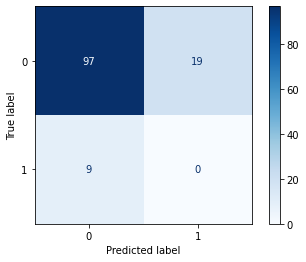

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

label = ["0", "1"]
cm = confusion_matrix(nus1_y_test, y_pred_nus1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [79]:
f1_score(nus1_y_test, y_pred_nus1, average='macro')

0.43693693693693697

In [80]:
f1_score(nus1_y_test, y_pred_nus1, average='micro')

0.776

In [81]:
f1_score(nus1_y_test, y_pred_nus1, average='weighted')

0.8109549549549551

In [82]:
f1_score(nus1_y_test, y_pred_nus1, average=None)

array([0.87387387, 0.        ])

In [83]:
test_scaled.groupby('target').count()

,left_weight,left_distance,right_weight,right_distance
target,,,,
0.0,116,116,116,116
1.0,9,9,9,9


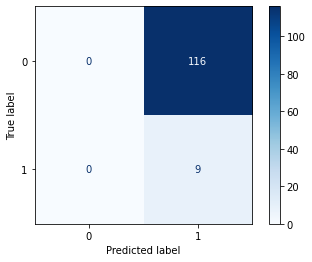

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

label = ["0", "1"]
cm = confusion_matrix(nus1_y_test, y_pred_org)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# **Accuracy**

In [85]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_X_train, nus1_y_train)
print('NUS1 Data')
print(knn.score(nus1_X_test, nus1_y_test))

#knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_org_X_train, nus1_org_y_train)
print('Without NUS!')
print(knn.score(nus1_X_test, nus1_y_test))

NUS1 Data
0.776
Without NUS!
0.072


# **Plot Results**

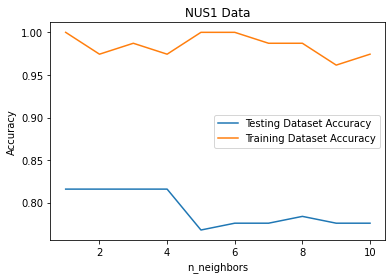

In [86]:
#NUS1 Data
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(nus1_X_train, nus1_y_train)
  
  train_accuracy[i] = knn.score(nus1_X_train, nus1_y_train)
  test_accuracy[i] = knn.score(nus1_X_test, nus1_y_test)

plt.plot(neighbors, test_accuracy, label='Testing Dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('NUS1 Data')
plt.show()

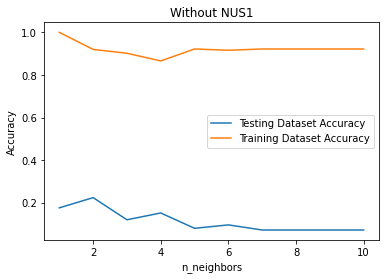

In [87]:
#Original Data (Without NUS1)
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(nus1_org_X_train, nus1_org_y_train)
  
  train_accuracy[i] = knn.score(nus1_org_X_train, nus1_org_y_train)
  test_accuracy[i] = knn.score(nus1_X_test, nus1_y_test)

plt.plot(neighbors, test_accuracy, label='Testing Dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Without NUS1')
plt.show()